# Consulta de temperaturas interactivo por Ciudad y Mes
## Objetivo
La creacion de un programa interactivo para la visualizacion de datos meteorologicos. Este programa permitira a los usuarios visualizar los registros climaticos, eligiendo el lugar y el mes. El objetivo es aplicar los conceptos de creacion de graficos, personalizacion de estilos y conbinarlo socn las habilidades de desarrollo de programas con Python.

## Consigna
1. **Cargar un DataFrame** con los datos meteorologicos.
2. Asegurate que las **fechas** esten en **formato correcto** para su manipulacion posterior.
3. Crea un programa que pida al usuario que seleccione una **ciudad** de la lista de ciudades disponibles en nuestro DataFrame y un **mes** del año.
4. Muestrale al usuario un grafico que muestre las temperaturas minimas y maximas que se registraron en la ciudad elegida durante el mes elegido.
5. El programa debe preguntarle al usuario si desea seguir haciendo consultas o no.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Cargar un DataFrame con los datos meteorologicos

In [ ]:
ruta = '\_DATA\Datos+Meteorológicos_Arg_2023.csv'
df = pd.read_csv(ruta)
df

### Asegurate que las fechas esten en formato correcto para su manipulacion postarior

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fecha                 1825 non-null   object 
 1   Ciudad                1825 non-null   object 
 2   Temperatura Maxima    1825 non-null   int64  
 3   Temperatura Minima    1825 non-null   int64  
 4   Precipitacion         1825 non-null   float64
 5   Velocidad del Viento  1825 non-null   float64
 6   Humedad Relativa      1825 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 99.9+ KB


In [8]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df.head()

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
0,2023-01-01,Buenos Aires,27,18,0.0,22.7,68.8
1,2023-01-01,Cordoba,35,18,0.0,33.8,61.7
2,2023-01-01,Rosario,23,21,0.0,10.6,80.0
3,2023-01-01,Mendoza,35,21,0.0,23.8,76.8
4,2023-01-01,Tucuman,36,18,17.2,25.7,54.9



### Se crea una lista ciudades

Para que cuando recibamos otro DataFrame con diferentes ciudades, se pueda adecuar automaticamente.

In [9]:
lista_ciudades = []
for i in df['Ciudad'].unique():
    if i not in lista_ciudades:
        lista_ciudades.append(i)

lista_ciudades

['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']

### Se crea un diccionario de meses

Para que despues se puedan usar como referencia al nombre del mes

In [10]:
dict_meses = {1:'Enero',
              2:'Febrero',
              3:'Marzo',
              4:'Abril',
              5:'Mayo',
              6:'Junio',
              7:'Julio',
              8:'Agosto',
              9:'Septiembre',
              10:'Octubre',
              11:'Noviembre',
              12:'Diciembre'}

### Funcion cuerpo del programa
* Solicitud de valores
* Creacion de DataFrame filtrado
* Generacion de Grafico de temperaturas
* Peticion al usuario para seguir consultando

In [13]:
def consultar_temperaturas():
    while True:
        # Mostramos ciudades disponibles
        print(f'\nCiudades disponibles: {lista_ciudades}')
        # Solicitar ciudad y mes
        ciudad_elegida = input('Ingrese la ciudad a consultar: ').title()
        mes_elegido = int(input('Ingrese un numero de mes (1-12): '))
        if ciudad_elegida not in lista_ciudades:
            print('La ciudad no existe')
            continue
        elif mes_elegido not in dict_meses:
            print('El mes no existe')
            continue
        # Creamos el DataFrame filtrado
        datos_ciudad_mes = df[(df['Ciudad'] == ciudad_elegida) & (df['Fecha'].dt.month == mes_elegido)]
        # Graficamos las temperaturas del DataFrame
        plt.figure(figsize=(10, 6))
        plt.plot(datos_ciudad_mes['Fecha'], datos_ciudad_mes['Temperatura Maxima'], label='Temperatura Maxima', color = 'red')
        plt.plot(datos_ciudad_mes['Fecha'], datos_ciudad_mes['Temperatura Minima'], label='Temperatura Minima', color = 'blue')
        plt.title(f'Temperaturas de {ciudad_elegida} durante el mes de {dict_meses[mes_elegido]}')
        plt.xlabel('Fecha')
        plt.ylabel('Temperaturas')
        plt.legend()
        plt.xticks(rotation=45)
        plt.show()
        otra_consulta = input('Deseas continuar consultando? (s/n): ').lower()
        if otra_consulta != 's':
            break


Ciudades disponibles: ['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']


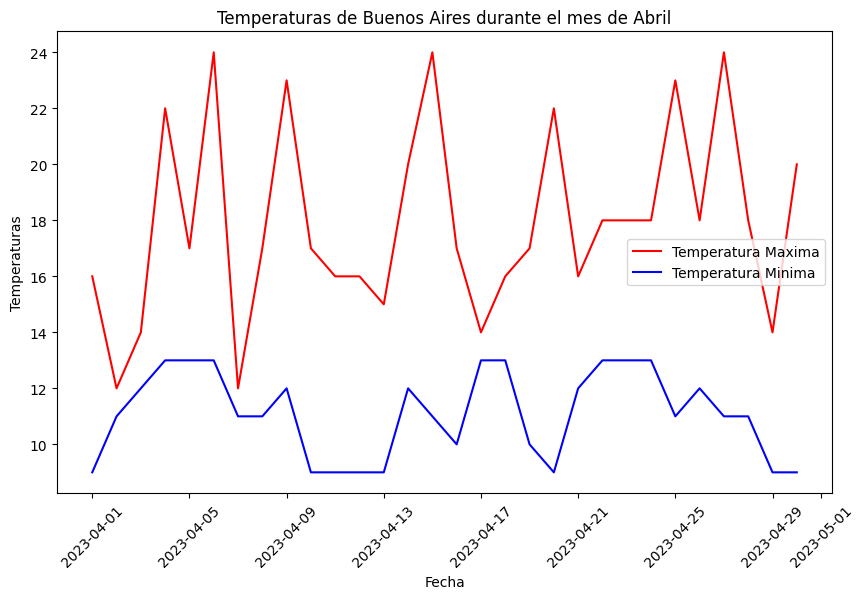


Ciudades disponibles: ['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']
La ciudad no existe

Ciudades disponibles: ['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']


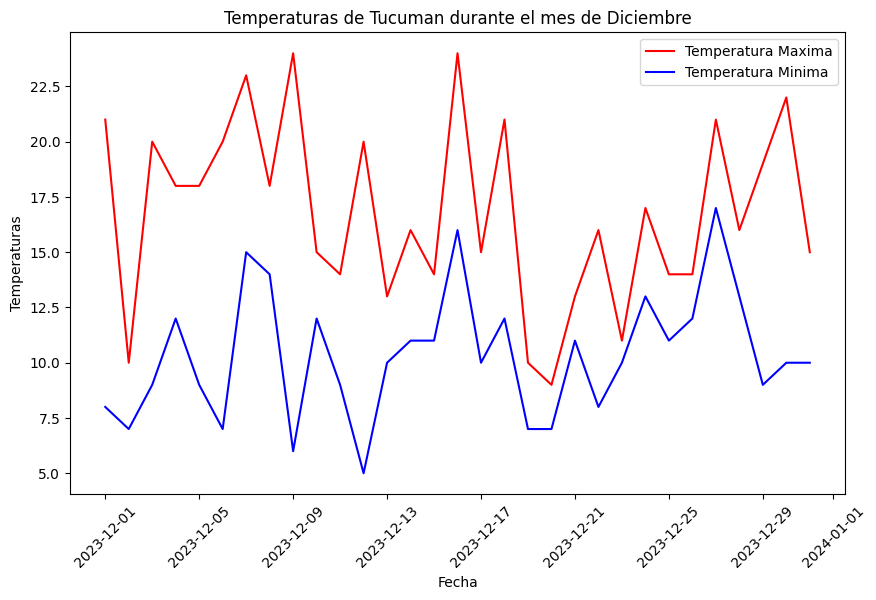


Ciudades disponibles: ['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']
El mes no existe

Ciudades disponibles: ['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']


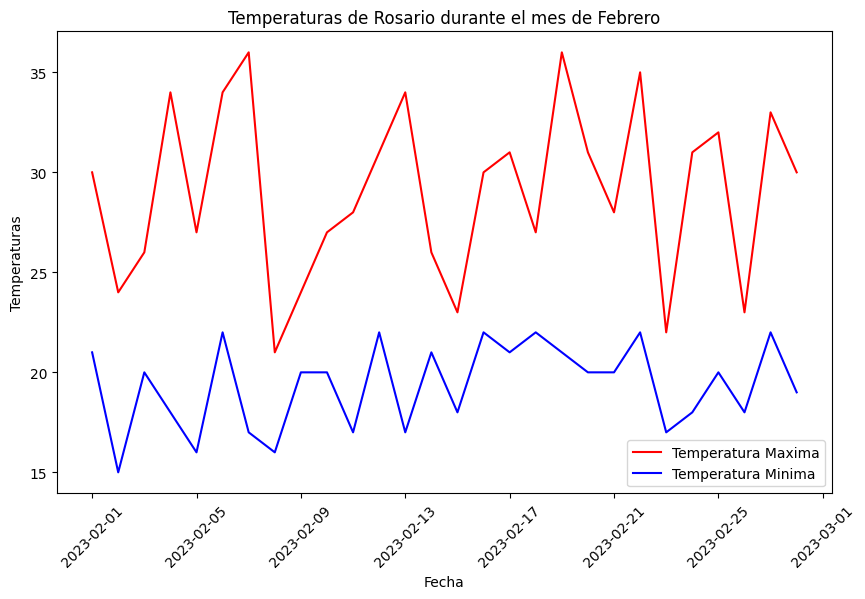

In [14]:
consultar_temperaturas()